# Kaviya Karthikeyan

Stock Prediction analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns

In [2]:
import matplotlib as mpl
from matplotlib import style

#Adjusting the size of matplotlib

mpl.rc('figure', figsize = (15 , 15))
mpl.__version__

#Adjusting the style of matplotlib

style.use('ggplot')

In [3]:
!pip install pandas-datareader

In [4]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

web data reader -pandas library to communicate with most updated Financial Data

In [5]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

In [6]:
df = web.DataReader("AAPL", 'yahoo', start, end)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.492369
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.593423
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.604822
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.499765
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.487749


MEAN
to determine trend of stock prices


In [8]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.head(10)

Date
2009-12-31   NaN
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
Name: Adj Close, dtype: float64

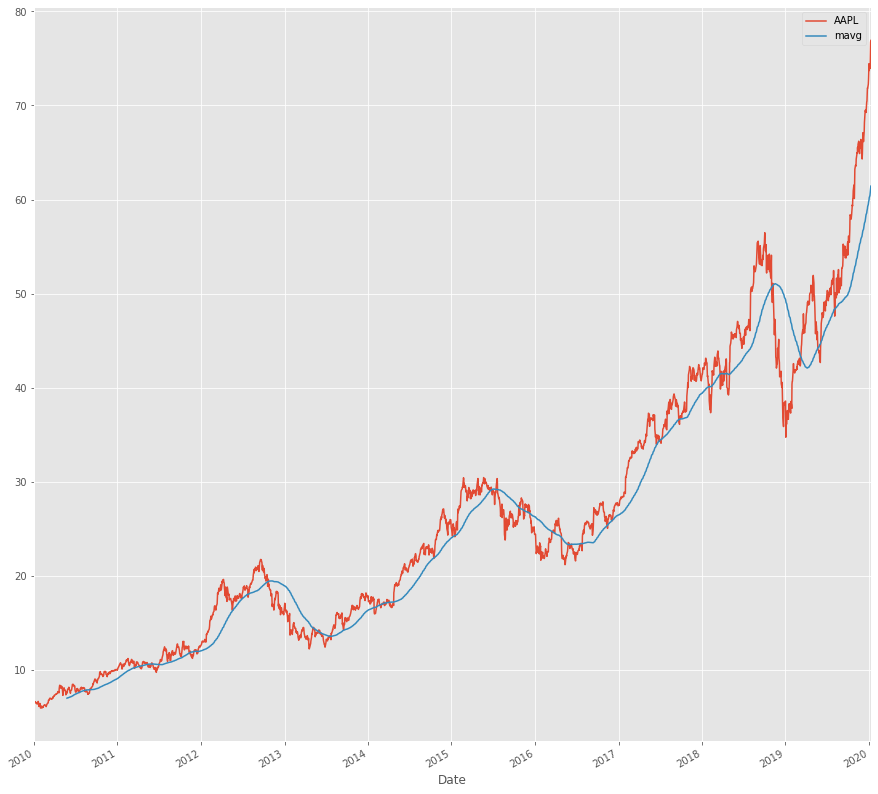

In [9]:
close_px.plot(label = 'AAPL')
mavg.plot(label = 'mavg')
plt.legend()
plt.show()

To determine deviation

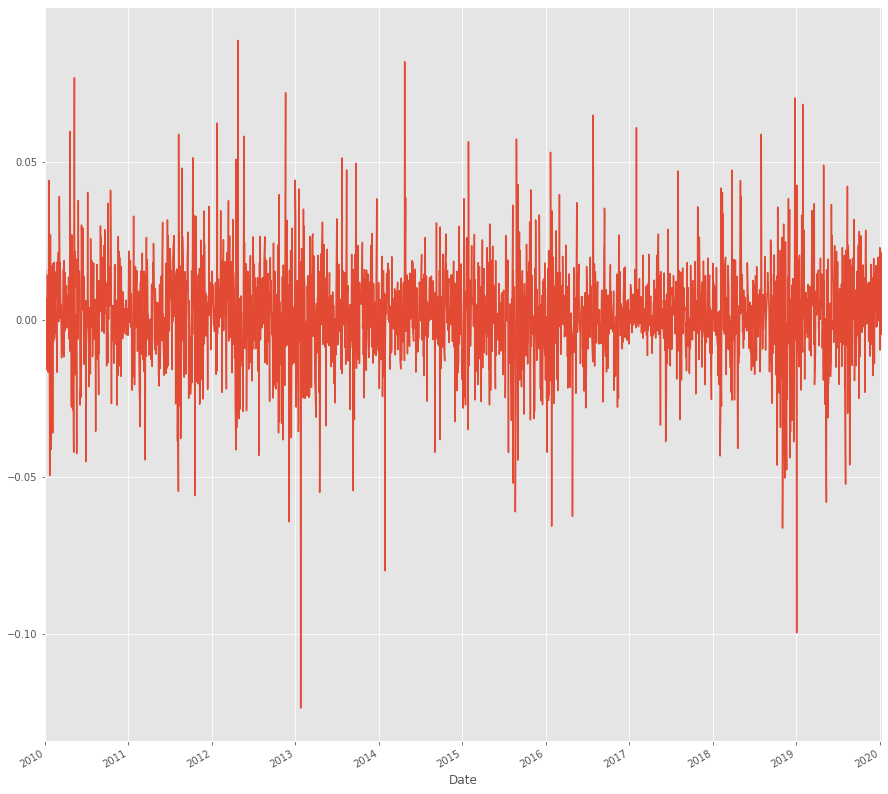

In [10]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label = 'return')
plt.show()

Comparison analysis

In [11]:
df.comp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start = start, end = end)['Adj Close']
df.comp.head(10)

C:\Users\Kaviya Karthikeyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,6.492369,10.773933,308.832428,92.667847,23.739305
2010-01-04,6.593423,11.001803,312.204773,93.765137,24.105360
2010-01-05,6.604822,11.058768,310.829926,92.632462,24.113148
2010-01-06,6.499765,11.001803,302.994293,92.030708,23.965164
2010-01-07,6.487749,11.571475,295.940735,91.712120,23.715933
2010-01-08,6.530882,11.820707,299.885956,92.632462,23.879499
2010-01-11,6.473268,11.934643,299.432648,91.662582,23.575750
2010-01-12,6.399635,11.941763,294.137512,92.391747,23.419973
2010-01-13,6.489905,11.984488,292.448822,92.193535,23.638054


Correlation Analysis

In [12]:
retscomp = df.comp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.021150,0.010920,0.011841,0.015420
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005151,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021539,0.013331,0.010035,0.006897
2010-01-11,-0.008822,0.009639,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006608
2010-01-13,0.014105,0.003578,-0.005741,-0.002145,0.009312


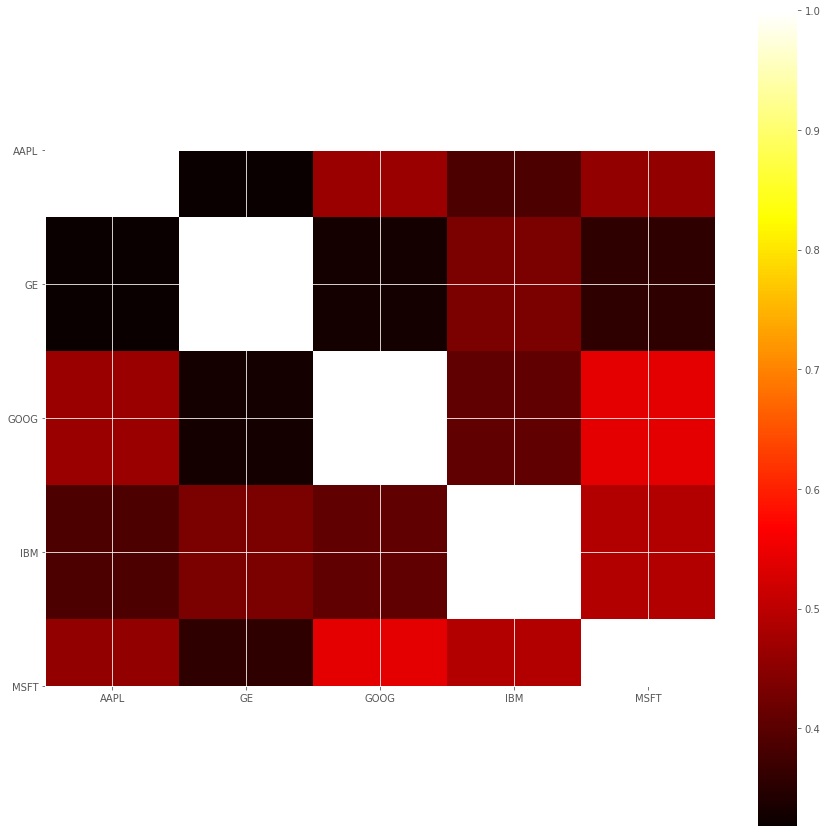

In [13]:
plt.imshow(corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

Stocks Return Rate and Risk

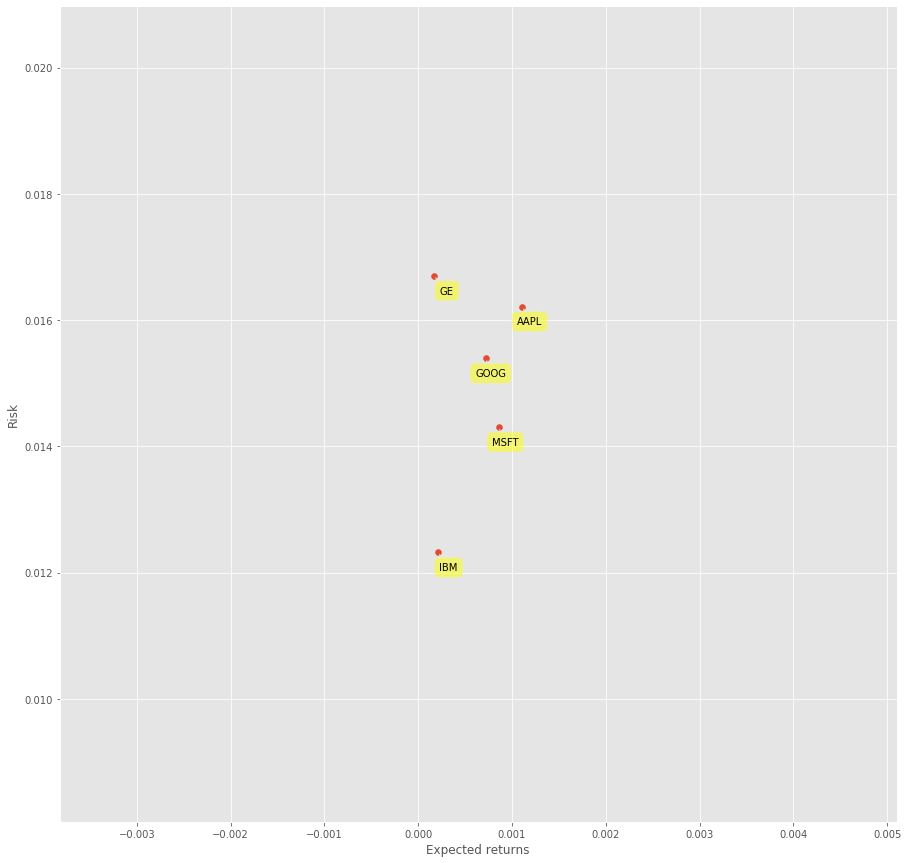

In [14]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label, xy = (x , y), xytext = (20 , -20), textcoords = 'offset points',
                 ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'yellow',
                 alpha = 0.5), arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0'))

In [15]:
df1 = pd.read_csv("india-news-headlines.csv")

In [ ]:
df1.head(10)

In [17]:

df1.tail(10)

,publish_date,headline_category,headline_text
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...
3297163,20200630,entertainment.hindi.bollywood,sushant singh rajputs demise fans trend cbifor...
3297164,20200630,entertainment.hindi.bollywood,amitabh bachchans grandson agastya nanda prepp...
3297165,20200630,home.education,icse isc result 2020 when where to check class...
3297166,20200630,city.lucknow,up govt imposes weekend restrictions from tonight
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
publish_date         int64
headline_category    object
headline_text        object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [19]:
df1.describe()

,publish_date
count,3.297172e+06
mean,2.012470e+07
std,4.896213e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [20]:
df1.max()

publish_date                                                  20200630
headline_category                                          young-turks
headline_text        ~!The 7 Plexus Knots story in a Galaxy called ...
dtype: object

In [21]:
df1.min()

publish_date                                20010101
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object

In [22]:
df1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [23]:
df1.isnull().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [24]:
df1.corr()

,publish_date
publish_date,1.0


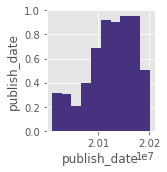

In [25]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

In [26]:
df1['headline_text'].value_counts()

Sunny Leone HOT photos                                             98
Watch top news in one-minute                                       90
Official Site                                                      89
Football: Italian Serie A table                                    88
Football: Spanish La Liga table                                    86
                                                                   ..
Activists demand correction of voter list at Ward level             1
With eye on polls; Cabinet to clear 240km of railway line in UP     1
Proposed hike in fine for stray animals on hold                     1
'Manwa Laage' crosses two million views in 48 hours                 1
Park your yachts someplace else                                     1
Name: headline_text, Length: 3082589, dtype: int64

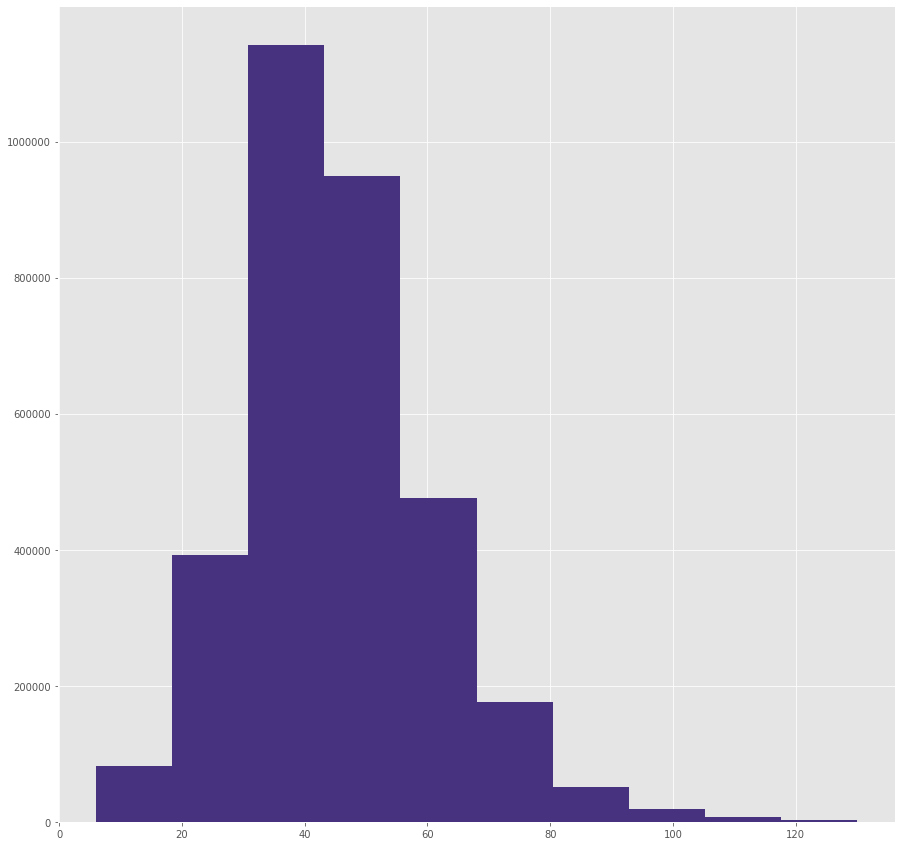

In [27]:
df1['headline_text'].str.len().hist()
plt.show()

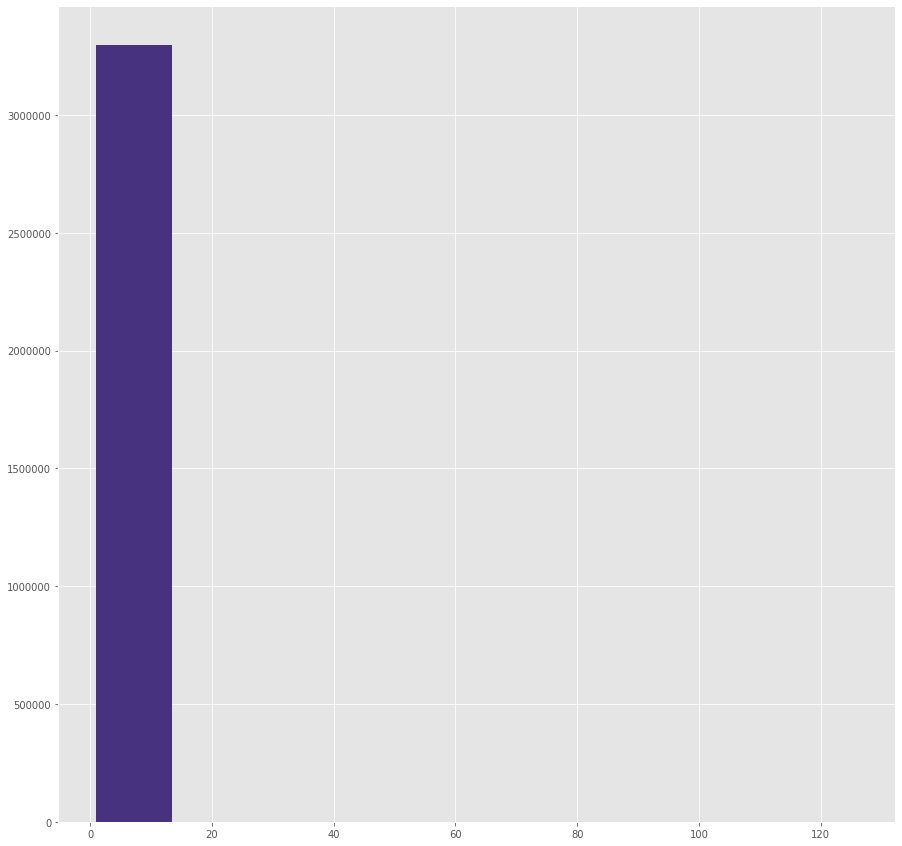

In [28]:
df1['headline_text'].str.split().\
    apply(lambda x : [len(i) for i in x]).\
    map(lambda x : np.mean(x)).hist()
plt.show()

In [30]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Kaviya
[nltk_data]     Karthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
corpus = []
new = df1['headline_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [32]:
from collections import defaultdict

dict = defaultdict(int)
for word in corpus:
    if word in stop:
        dict[word]+=1

In [33]:
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

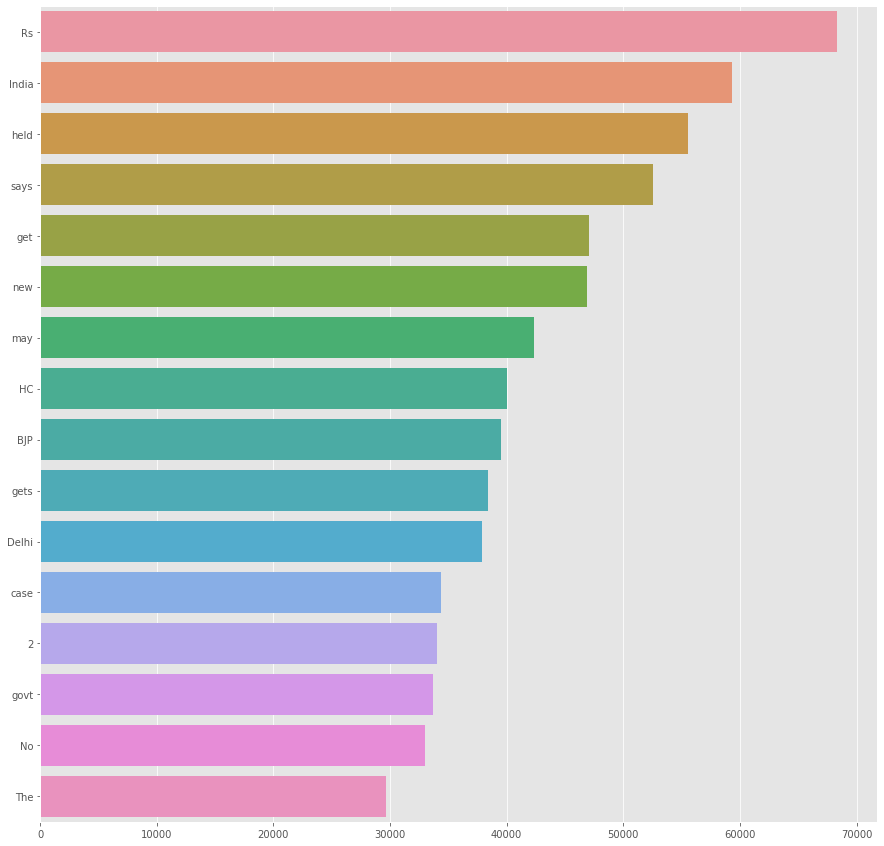

In [35]:
sns.barplot(x = y , y = x)
plt.show()

Ngram Exploration

In [36]:
from nltk.util import ngrams
list(ngrams(['I' , 'went', 'to', 'the', 'river', 'bank'], 2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (n , n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_frq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_feq = sorted(words_frq, key = lambda x : x[1], reverse = True)
    return words_frq[:10]

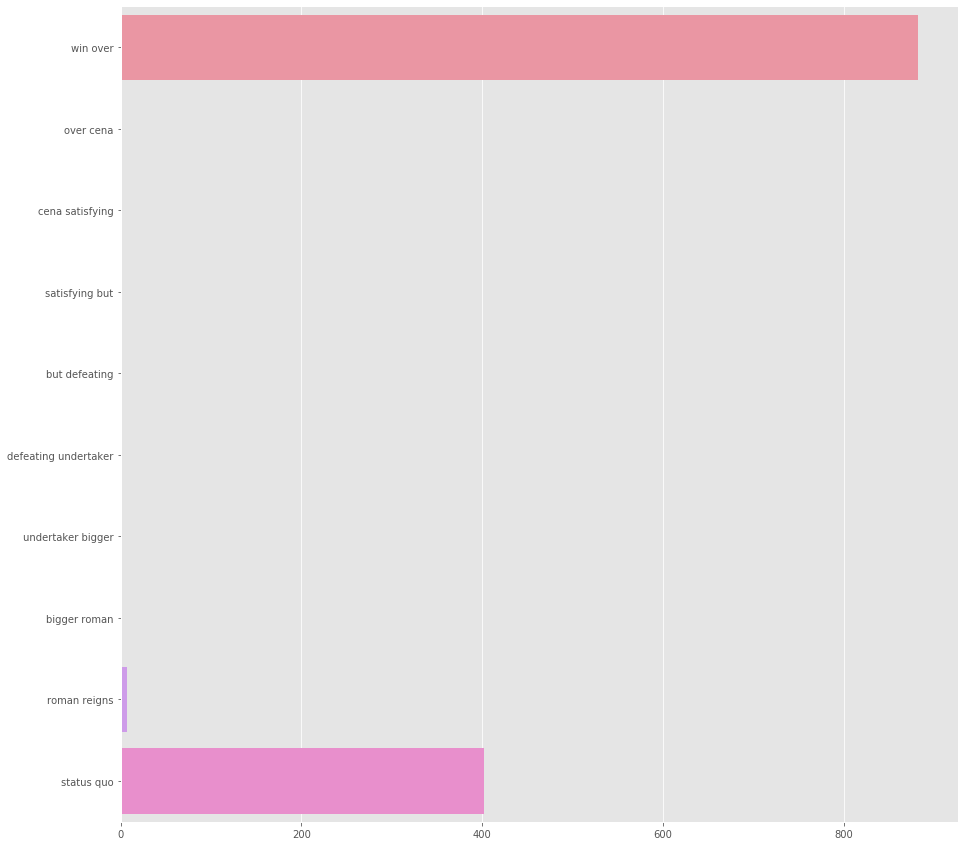

In [38]:
top_n_bigrams = get_top_ngram(df1['headline_text'], 2)[:10]
x,y = map(list, zip(*top_n_bigrams))
sns.barplot(x = y, y = x)
plt.show()

In [39]:
!pip install textblob

In [40]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)